In [9]:
import ast
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np


In [4]:
def parse_list_column(column):
    return ast.literal_eval(column)


def get_processed_data_bertopic(csv_file="../../data/arxiv_processed.csv"):
    df = pd.read_csv(csv_file, sep=";", converters={'Processed Summary': parse_list_column})
    df['Processed Summary'] = df['Processed Summary'].apply(lambda x: " ".join(x))
    return df

In [5]:
df = get_processed_data_bertopic()
data = df['Processed Summary'].tolist()

In [6]:
words = " ".join(data).split()
word_counts = Counter(words)
word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

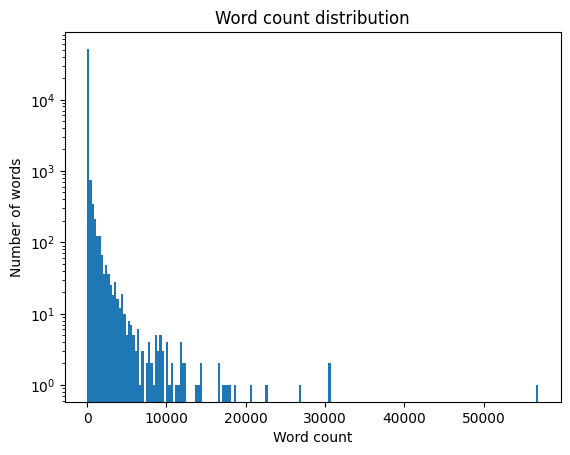

In [7]:
plt.hist(word_counts.values(), bins=200)
plt.yscale('log')
plt.xlabel("Word count")
plt.ylabel("Number of words")
plt.title("Word count distribution")
plt.show()

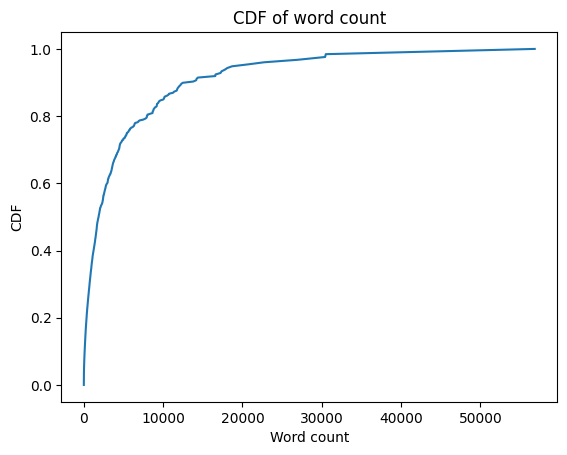

In [10]:
word_counts_cdf = np.array(list(word_counts.values()))
word_counts_cdf = np.sort(word_counts_cdf)
cdf = np.cumsum(word_counts_cdf) / np.sum(word_counts_cdf)
plt.plot(word_counts_cdf, cdf)
plt.xlabel("Word count")
plt.ylabel("CDF")
plt.title("CDF of word count")
plt.show()

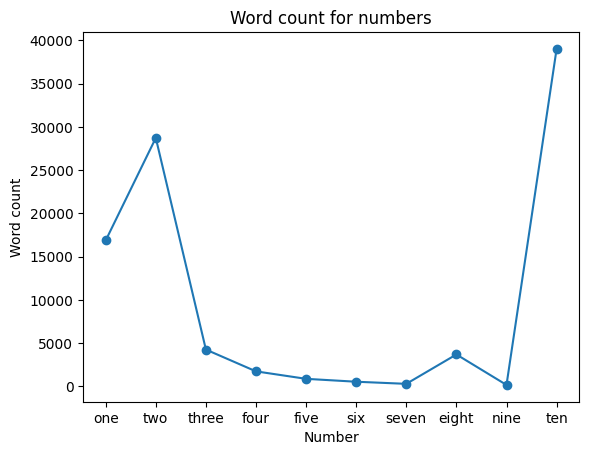

In [11]:
# count how many times each number from 0-100 appears in the word counts
numbers = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]
number_counts = {number: 0 for number in numbers}
for number in numbers:
    for word, count in word_counts.items():
        if number in word:
            number_counts[number] += count

plt.plot(number_counts.keys(), number_counts.values(), marker='o')
plt.xlabel("Number")
plt.ylabel("Word count")
plt.title("Word count for numbers")
plt.show()

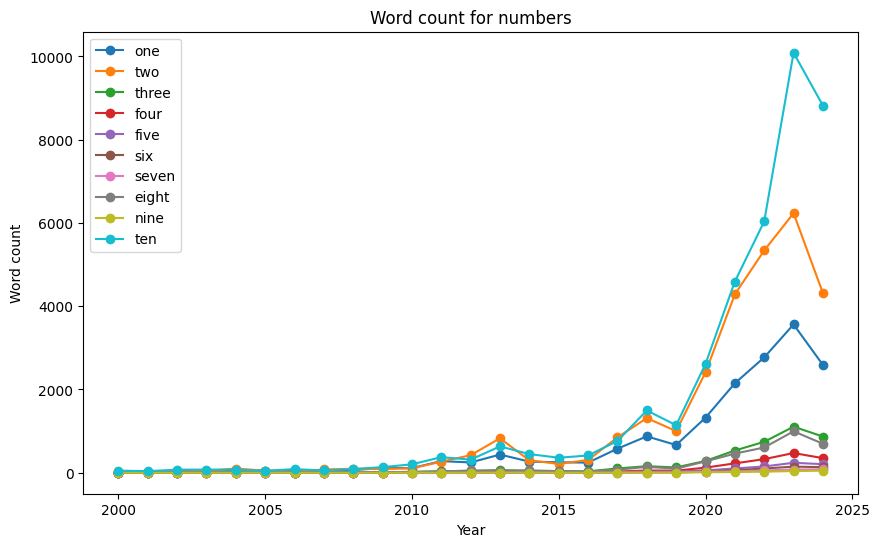

In [12]:
years = list(set(df['Published'].str[:4].astype(int).tolist()))
df['Year'] = df['Published'].str[:4].astype(int)
number_counts_year = {number: {year: 0 for year in years} for number in numbers}
year_counters = {year: Counter() for year in years}
for number in numbers:
    for year in years:
        df_year = df[df['Year'] == year]
        data_year = df_year['Processed Summary'].tolist()
        words = " ".join(data_year).split()
        word_counts = Counter(words)
        year_counters[year] = word_counts

numbers = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]
for year in years:
    for number in numbers:
        for word, count in year_counters[year].items():
            if number in word:
                number_counts_year[number][year] += count

plt.figure(figsize=(10, 6))
for number in numbers:
    plt.plot(number_counts_year[number].keys(), number_counts_year[number].values(), marker='o', label=number)
plt.xlabel("Year")
plt.ylabel("Word count")
plt.title("Word count for numbers")
plt.legend()